In [802]:
# Dependencies
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [803]:
# Load Datasets
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
outbreak_data = pd.read_csv('/Users/admin/Documents/GitHub/Covidvariant/cleaned_covid_data.csv')

/var/folders/64/v3w6ln215tzd14scrycwkjl40000gn/T/ipykernel_96146/1162733491.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [804]:
# Display dataset
outbreak_data.head()

,Country,first_seq,num_seqs,last_seq,variant,censure_date,duration,censored,mortality_rate,total_cases,total_deaths,growth_rate
0,China,2019-10-22,3,2020-06-03,S.Q677,2020-06-21,225,True,0.052983,18259.460120,967.435583,16447.430710
1,USA,2020-03-03,26022,2021-11-19,S.Q677,2020-11-01,626,False,0.016111,256577.596200,4133.841031,84748.745880
2,Brazil,2020-03-09,1553,2021-11-12,S.Q677,2020-11-07,613,False,0.027846,101550.140500,2827.764288,42356.907430
3,Australia,2020-03-20,88,2021-11-14,S.Q677,2020-11-18,604,False,0.009905,1402.239579,13.889752,1227.122500
4,Sweden,2020-03-20,810,2021-11-19,S.Q677,2020-11-18,609,False,0.012711,1659.148728,21.089425,2521.042925


In [805]:
# Using naturalearthlowres with geopandas to visualise the world map
# Adjusted figure size to prevent overlap


/var/folders/64/v3w6ln215tzd14scrycwkjl40000gn/T/ipykernel_96146/4067759770.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


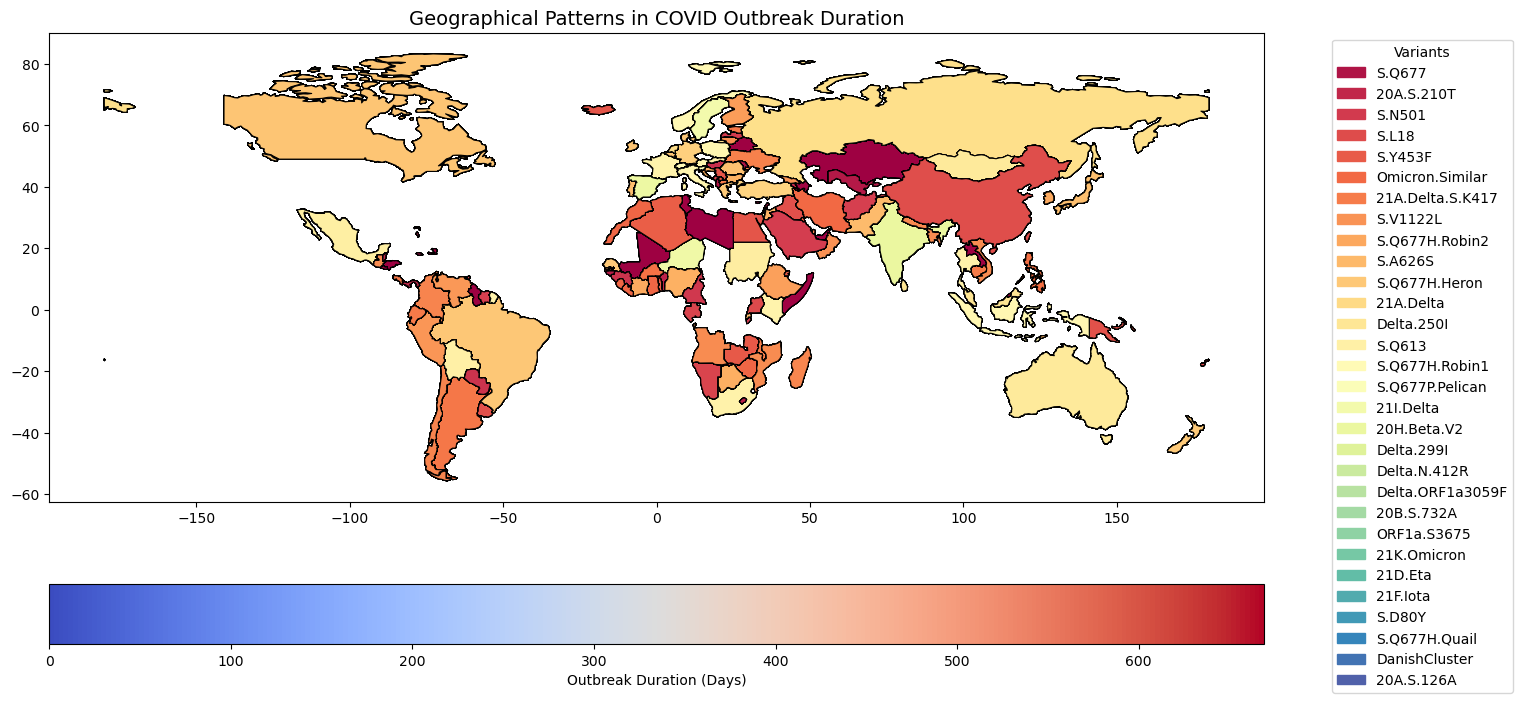

In [806]:
# Find geographical patterns in Outbreak Duration

# Load Datasets
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
outbreak_data = pd.read_csv('/Users/admin/Documents/Github/Covidvariant/cleaned_covid_data.csv')

# Outbreak_data merge with World_map
outbreak_map = world_map.merge(outbreak_data, how="left", left_on="name", right_on="Country")

# Set up figure with adjusted size to prevent overlap
fig, ax = plt.subplots(1, 1, figsize=(18, 12))

# Assign first 30 variants with a unique color 
unique_variants = outbreak_data['variant'].unique()[:30]
variant_color = sns.color_palette("Spectral", n_colors=len(unique_variants))
variant_dict = dict(zip(unique_variants, variant_color))

# List first 30 unique variant names in the legend
legend_entries = [Patch(color=variant_dict[variant], label=variant) for variant in unique_variants]

# Legend
ax.legend(handles=legend_entries, title="Variants", loc="upper left", fontsize=10, bbox_to_anchor=(1.05, 1))

# Add color bar to visualisation variant duration days
outbreak_map.plot(column='duration', cmap='Spectral', linewidth=0.8, edgecolor='black', legend=False, ax=ax)

# Add Duration values into the color bar
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=outbreak_map['duration'].min(), vmax=outbreak_map['duration'].max()))
sm.set_array([])

# Position Color Bar under map
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.08, pad=0.1)
cbar.set_label("Outbreak Duration (Days)")

#Add title and display plot
plt.title("Geographical Patterns in COVID Outbreak Duration", fontsize=14)
plt.subplots_adjust(right=0.8, bottom=0.2)
plt.show()



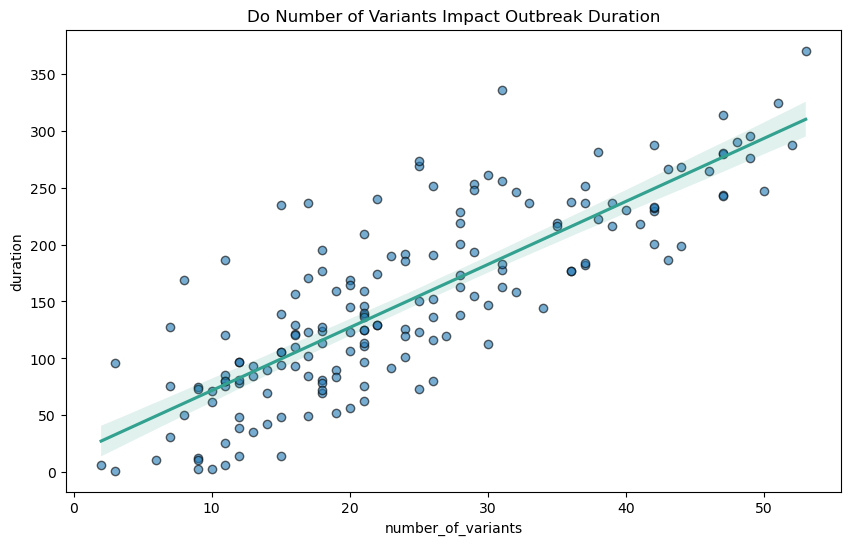

In [807]:
# Does the number of variants in a country impact the length of an outbreak?

# How Many Unique Variants per country
variant_counts = df.groupby("Country")["variant"].nunique().reset_index()
variant_counts.rename(columns={"variant": "number_of_variants"}, inplace=True)

# Average outbreak duration
duration_avg = df.groupby("Country")["duration"].mean().reset_index()

# Merge Data
merged_data = variant_counts.merge(duration_avg, on="Country")

# Scatter Plot 
plt.figure(figsize=(10, 6))
sns.regplot(x=merged_data["number_of_variants"], y=merged_data["duration"],
            scatter_kws={"alpha": 0.6, "edgecolors":"black"}, line_kws={"color": "#33A18F"})

# Labels & Title
plt.xlabel
plt.ylabel
plt.title("Do Number of Variants Impact Outbreak Duration")

plt.show()